<a href="https://colab.research.google.com/github/tung1803/AI/blob/main/PhanLoaiHoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder1= '/content/drive/MyDrive/data/Flower/Cuc/'
folder2= '/content/drive/MyDrive/data/Flower/MatTroi/'
folder3= '/content/drive/MyDrive/data/Flower/ThuocDuoc/'
folder4= '/content/drive/MyDrive/data/Flower/VanTho/'

photos, labels = list(), list()
for file in listdir(folder1):
  if file.startswith('Cuc'):
    output = 0
    photo = load_img(folder1+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder2):
  if file.startswith('MatTroi'):
    output = 1
    photo = load_img(folder2+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder3):
  if file.startswith('ThuocDuoc'):
    output = 2
    photo = load_img(folder3+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder4):
  if file.startswith('VanTho'):
    output = 3
    photo = load_img(folder4+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)


photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('KhuonMat_photos.npy', photos)
save('KhuonMat_labels.npy', labels)

(88, 150, 150, 3) (88,)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (150,150,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
 history = model.fit(photos, labels, epochs=10, verbose=1)

Epoch 1/10
3/3 [==============================] - 5s 1s/step - loss: 3302.9070 - accuracy: 0.1477
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 1527.6008 - accuracy: 0.3182
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 162.6679 - accuracy: 0.2955
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 16.2337 - accuracy: 0.4886
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 5.8736 - accuracy: 0.7386
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 1.5862 - accuracy: 0.9318
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 1.1441 - accuracy: 0.9318
Epoch 8/10
3/3 [==============================] - 6s 2s/step - loss: 1.2322 - accuracy: 0.9091
Epoch 9/10
3/3 [==============================] - 5s 1s/step - loss: 0.6259 - accuracy: 0.9432
Epoch 10/10
3/3 [==============================] - 5s 1s/step - loss: 0.0040 - accuracy: 1.0000


In [6]:
model.save('Phanloaihoa_Final.h5')

In [7]:
from keras.models import load_model
models=load_model('Phanloaihoa_Final.h5')

In [8]:
classes = ["Cuc","MatTroi","ThuocDuoc","VanTho"]

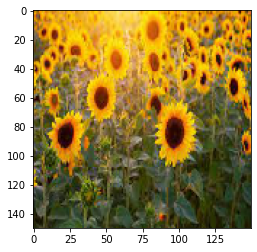

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/data/Flower/MatTroi/MatTroi.1.jpg', 
               target_size=(150,150))
plt.imshow(img)

In [11]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
print(classes[y_classes[0]])

[[0.0914092  0.09790259 0.09117472 0.09477364 0.08921532 0.09111578
  0.09120246 0.09165374 0.08857491 0.08741066 0.08556699]]
MatTroi
